In [19]:
from bs4 import BeautifulSoup
import urllib.request as REQ
import pandas as pd
import numpy as np
from datetime import datetime 

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

## pandas_datareader
- 크롤링을 하지 않고 주가 정보를 데이터프레임을 형성
- 금융정보를 크롤링 하지 않고 데이터 프레임으로 받아올 수 있음

## 시계열 데이터(Timeseries)
- datetime 표준 라이브러리
    - 속성
        - dt.year
        - dt.month
        ...
    - datetime.now()
        - 정적 메소드
        - 현재시각을 얻어올 수 있다
- 정의
    - 1. **인덱스가 datetime**형인 것
    - 2. 시계열 데이터만의 indexing, slicing방법을 사용가능
- 문자열을 datetime으로 변환
    - pd.to_datetime( )
        - **단, yyyy-mm-dd or yyyy/mm/dd 형식인 경우만 바로 변환 가능**
        - 형식이 다르면 **format**을 맞춰줘야함
            - 포맷 맞추는 사이트: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
- Resample rule

In [4]:
# !pip install pandas_datareader

  Using cached pandas_datareader-0.9.0-py3-none-any.whl (107 kB)


In [20]:
# !pip install pandas_datareader
from pandas_datareader import data

In [6]:
dt = datetime( 1999, 12, 23, 5, 12, 13 )
dt
print( dt.year, dt.month, dt.day, dt.hour)

1999 12 23 5


In [7]:
cur = datetime.now()
cur

datetime.datetime(2021, 1, 3, 0, 9, 33, 914213)

### 시계열 데이터 정의

In [9]:
data = [[1,2], [3,4], [5,6], [7,8],[9,10],[11,12],[13,14],[15,16]]
data = pd.DataFrame( data )
data.index = ['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
             '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01']
type( data.index )   # 인덱스 타입

pandas.core.indexes.base.Index

In [8]:
type( datetime(2019,1,1))   # 데이트타임 타입형으로 바꿔줘야 함.

datetime.datetime

In [10]:
data = [[1,2], [3,8], [6,6], [7,3],[9,12],[14,12],[13,14],[15,16]]
data = pd.DataFrame( data )
data.index = [datetime(2019,1,1),datetime(2019,2,1),datetime(2019,3,1),datetime(2019,4,1)
             ,datetime(2019,5,1),datetime(2019,6,1),datetime(2019,7,1),datetime(2019,8,1)]
data

,0,1
2019-01-01,1,2
2019-02-01,3,8
2019-03-01,6,6
2019-04-01,7,3
2019-05-01,9,12
2019-06-01,14,12
2019-07-01,13,14
2019-08-01,15,16


In [12]:
data.columns = ['A','B']

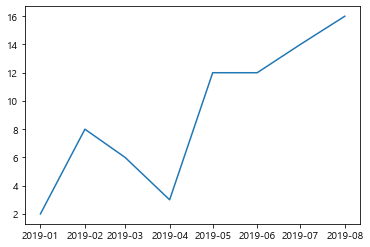

In [136]:
plt.plot( data.index, data['B'] )
plt.show()

## 이동평균
- df.rolling( )
    - window만큼 이동시켜준다.

In [139]:
data.rolling( window=2 ).mean()

,A,B
2019-01-01,NaN,NaN
2019-02-01,2.0,5.0
2019-03-01,4.5,7.0
2019-04-01,6.5,4.5
2019-05-01,8.0,7.5
2019-06-01,11.5,12.0
2019-07-01,13.5,13.0
2019-08-01,14.0,15.0


In [140]:
data.rolling( window=3 ).mean()

,A,B
2019-01-01,NaN,NaN
2019-02-01,NaN,NaN
2019-03-01,3.333333,5.333333
2019-04-01,5.333333,5.666667
2019-05-01,7.333333,7.000000
2019-06-01,10.000000,9.000000
2019-07-01,12.000000,12.666667
2019-08-01,14.000000,14.000000


In [37]:
type( data.index )

pandas.core.indexes.base.Index

## **문자열을 데이트타입으로 변환

In [42]:
data.index = pd.to_datetime(data.index) # format을 지정해줘야함

In [44]:
type( data.index ) # datetime형으로 변환
data.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01'],
              dtype='datetime64[ns]', freq=None)

In [60]:
## 2019년 1월 1일 -> 변환
day = '2019년 1월 1일'
pd.to_datetime( day ) # TypeError : Unknown string format: 2019년 1월 1일

ParserError: Unknown string format: 2019년 1월 1일

In [62]:
day = pd.to_datetime( day , format='%Y년 %m월 %d일' )
day

Timestamp('2019-01-01 00:00:00')

In [17]:
pd.to_datetime( '19년 6월' , format='%y년 %m월')

Timestamp('2019-06-01 00:00:00')

## 주식데이터 가져오기
-data.get_data_yahoo( 종목코드, 시작날짜, 끝날짜 )

In [23]:
samsung_df = data.get_data_yahoo('005930.KS', '2017/01/01')
samsung_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,36240.0,35880.0,35980.0,36100.0,4650600.0,7630.107910
2017-01-03,36620.0,36020.0,36280.0,36480.0,7357650.0,7710.425293
2017-01-04,36520.0,36100.0,36500.0,36160.0,7971750.0,7642.790527
2017-01-05,36060.0,35540.0,36060.0,35560.0,10967450.0,7515.973145
2017-01-06,36440.0,36040.0,36180.0,36200.0,8880950.0,7651.245117
...,...,...,...,...,...,...
2020-12-23,74000.0,72300.0,72400.0,73900.0,19411326.0,73900.000000
2020-12-24,78800.0,74000.0,74100.0,77800.0,32502870.0,77800.000000
2020-12-28,80100.0,78200.0,79000.0,78700.0,40085044.0,78700.000000


In [24]:
samsung_df.index # datetime인 것을 알 수 있음

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=974, freq=None)

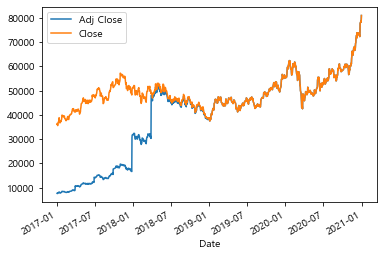

In [25]:
samsung_df.plot( kind='line', y=['Adj Close', 'Close'] )
plt.show()

In [31]:
samsung_df.rolling( window=5 ).mean()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,36376.0,35916.0,36200.0,36100.0,7965680.0,7630.108398
...,...,...,...,...,...,...
2020-12-23,73600.0,72400.0,72940.0,73100.0,19597966.8,73100.000000
2020-12-24,74620.0,72680.0,73080.0,74000.0,21239898.0,74000.000000
2020-12-28,75900.0,73720.0,74220.0,75140.0,25734301.0,75140.000000


## *라인 차트
- ``'b'``          blue
``'g'``          green
``'r'``          red
``'c'``          cyan
``'m'``          magenta
``'y'``          yellow
``'k'``          black
``'w'``          white

- ``'-'``          solid line style
``'--'``         dashed line style
``'-.'``         dash-dot line style
``':'``          dotted line style

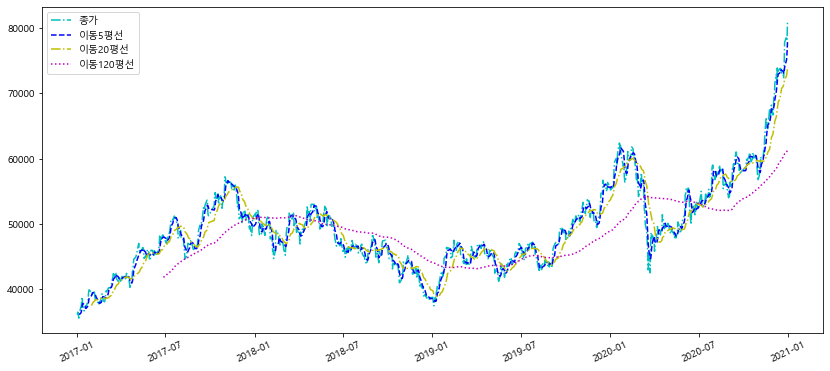

In [91]:
plt.figure( figsize=(14,6) )

plt.plot( samsung_df['Close'],'c-.' )

plt.plot( samsung_df.rolling( window=5 ).mean()['Close'] , 'b--')
plt.plot( samsung_df.rolling( window=20 ).mean()['Close'] ,'y-.')
plt.plot( samsung_df.rolling( window=120 ).mean()['Close'] ,'m:')

plt.legend( ['종가','이동5평선','이동20평선','이동120평선'] )
plt.xticks( rotation=25 )


plt.show()

In [83]:
data.get_data_yahoo('KOSPI.KS') 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-29,2823.439941,2792.060059,2810.550049,2805.399902,525648,2805.399902


## 시계열 데이터 인덱싱/슬라이싱
- data['2019'] = 2019년도 데이터만 추출

In [92]:
samsung_df['2019']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39400.0,38550.0,39400.0,38750.0,7847664.0,38750.0
2019-01-03,38550.0,37450.0,38300.0,37600.0,12471493.0,37600.0
2019-01-04,37600.0,36850.0,37450.0,37450.0,14108958.0,37450.0
2019-01-07,38900.0,37800.0,38000.0,38750.0,12748997.0,38750.0
2019-01-08,39200.0,37950.0,38000.0,38100.0,12756554.0,38100.0
...,...,...,...,...,...,...
2019-12-23,56400.0,55100.0,56100.0,55500.0,9839252.0,55500.0
2019-12-24,55700.0,54800.0,55600.0,55000.0,11868463.0,55000.0
2019-12-26,55400.0,54400.0,54700.0,55400.0,9645034.0,55400.0


In [93]:
samsung_df['2019-01']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39400.0,38550.0,39400.0,38750.0,7847664.0,38750.0
2019-01-03,38550.0,37450.0,38300.0,37600.0,12471493.0,37600.0
2019-01-04,37600.0,36850.0,37450.0,37450.0,14108958.0,37450.0
2019-01-07,38900.0,37800.0,38000.0,38750.0,12748997.0,38750.0
2019-01-08,39200.0,37950.0,38000.0,38100.0,12756554.0,38100.0
2019-01-09,39600.0,38300.0,38650.0,39600.0,17452708.0,39600.0
2019-01-10,40150.0,39600.0,40000.0,39800.0,14731699.0,39800.0
2019-01-11,40550.0,39950.0,40350.0,40500.0,11661063.0,40500.0
2019-01-14,40700.0,39850.0,40450.0,40050.0,11984996.0,40050.0


In [94]:
samsung_df['2019-01':'2019-07']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39400.0,38550.0,39400.0,38750.0,7847664.0,38750.0
2019-01-03,38550.0,37450.0,38300.0,37600.0,12471493.0,37600.0
2019-01-04,37600.0,36850.0,37450.0,37450.0,14108958.0,37450.0
2019-01-07,38900.0,37800.0,38000.0,38750.0,12748997.0,38750.0
2019-01-08,39200.0,37950.0,38000.0,38100.0,12756554.0,38100.0
...,...,...,...,...,...,...
2019-07-25,47200.0,46600.0,47150.0,47200.0,8408838.0,47200.0
2019-07-26,47150.0,46550.0,46650.0,47150.0,7873886.0,47150.0
2019-07-29,47050.0,46000.0,46800.0,46100.0,6856846.0,46100.0


In [86]:
samsung_df[:'2018']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,36240.0,35880.0,35980.0,36100.0,4650600.0,7630.107910
2017-01-03,36620.0,36020.0,36280.0,36480.0,7357650.0,7710.425293
2017-01-04,36520.0,36100.0,36500.0,36160.0,7971750.0,7642.790527
2017-01-05,36060.0,35540.0,36060.0,35560.0,10967450.0,7515.973145
2017-01-06,36440.0,36040.0,36180.0,36200.0,8880950.0,7651.245117
...,...,...,...,...,...,...
2018-12-21,38650.0,38100.0,38200.0,38650.0,14947080.0,38293.230469
2018-12-24,39050.0,38300.0,38500.0,38800.0,9729530.0,38441.843750
2018-12-26,38750.0,38300.0,38400.0,38350.0,12707675.0,37996.000000


In [95]:
samsung_df.index.year # 연도만 인덱싱해온다.

Int64Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='Date', length=974)

In [89]:
samsung_df.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=973)

In [96]:
samsung_df['year'] = samsung_df.index.year
samsung_df

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-01-02,36240.0,35880.0,35980.0,36100.0,4650600.0,7630.107910,2017
2017-01-03,36620.0,36020.0,36280.0,36480.0,7357650.0,7710.425293,2017
2017-01-04,36520.0,36100.0,36500.0,36160.0,7971750.0,7642.790527,2017
2017-01-05,36060.0,35540.0,36060.0,35560.0,10967450.0,7515.973145,2017
2017-01-06,36440.0,36040.0,36180.0,36200.0,8880950.0,7651.245117,2017
...,...,...,...,...,...,...,...
2020-12-23,74000.0,72300.0,72400.0,73900.0,19411326.0,73900.000000,2020
2020-12-24,78800.0,74000.0,74100.0,77800.0,32502870.0,77800.000000,2020
2020-12-28,80100.0,78200.0,79000.0,78700.0,40085044.0,78700.000000,2020


In [95]:
samsung_df.groupby( 'year' ).mean()

,High,Low,Open,Close,Volume,Adj Close
year,,,,,,
2017,46713.221757,45887.949791,46285.355649,46300.502092,1.148688e+07,13143.165121
2018,47346.942149,46335.165289,46860.785124,46823.471074,1.259780e+07,41784.777424
2019,46965.306122,46098.571429,46541.632653,46557.959184,1.089198e+07,46557.959184
2020,57733.198381,56415.182186,57062.753036,57070.445344,2.165909e+07,57070.445344


In [97]:
samsung_df.groupby( samsung_df.index.year ).mean( )

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017,46713.221757,45887.949791,46285.355649,46300.502092,1.148688e+07,13143.165121,2017
2018,47346.942149,46335.165289,46860.785124,46823.471074,1.259780e+07,41784.777424,2018
2019,46965.306122,46098.571429,46541.632653,46557.959184,1.089198e+07,46557.959184,2019
2020,57733.198381,56415.182186,57062.753036,57070.445344,2.165909e+07,57070.445344,2020


In [99]:
samsung_df.groupby( samsung_df.index.month ).mean( )[['Close']]

,Close
Date,
1,46865.301205
2,47878.000000
3,46441.411765
4,46829.759036
5,47138.101266
6,48336.543210
7,49165.842697
8,48258.588235
9,50749.090909


In [102]:
samsung_df.groupby( [samsung_df.index.year, samsung_df.index.month] ).mean( )[['Close']]

Close
Date Date              
2017 1     37486.000000
     2     38571.000000
     3     41166.363636
     4     41959.000000
     5     45550.526316
     6     46574.285714
     7     49393.333333
     8     46858.181818
     9     50214.000000
     10    53961.250000
     11    55366.000000
     12    50733.333333
2018 1     49933.333333
     2     47248.888889
     3     49683.809524
     4     50163.809524
     5     51102.500000
     6     48371.052632
     7     46220.454545
     8     45947.727273
     9     46064.705882
     10    43600.000000
     11    43390.476190
     12    39826.315789
2019 1     41600.000000
     2     46308.823529
     3     44560.000000
     4     46061.363636
     5     43023.809524
     6     44865.789474
     7     46215.217391
     8     43840.476190
     9     47294.736842
     10    49880.952381
     11    52195.000000
     12    53507.500000
2020 1     58815.000000
     2     59085.000000
     3     50331.818182
     4     49045.000000
     5     49100.000000
     6     52986.363636
     7     54726.086957
     8     56980.000000
     9     58176.190476
     10    59736.842105
     11    63419.047619
     12    73240.000000

# Resample rule
http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
- 시계열 데이터 전용 집계함수 사용법
- groupby 함수랑 사용법이 같다


In [106]:
samsung_df.resample('A').mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-12-31,46713.221757,45887.949791,46285.355649,46300.502092,1.148688e+07,13143.165121,2017
2018-12-31,47346.942149,46335.165289,46860.785124,46823.471074,1.259780e+07,41784.777424,2018
2019-12-31,46965.306122,46098.571429,46541.632653,46557.959184,1.089198e+07,46557.959184,2019
2020-12-31,57733.198381,56415.182186,57062.753036,57070.445344,2.165909e+07,57070.445344,2020


In [116]:
samsung_df.resample('Q').mean()[['Close']] 

,Close
Date,
2017-03-31,39141.935484
2017-06-30,44711.666667
2017-09-30,48768.571429
2017-12-31,53405.555556
2018-03-31,49040.666667
2018-06-30,49909.000000
2018-09-30,46078.688525
2018-12-31,42352.459016
2019-03-31,43960.169492


In [115]:
samsung_df.resample('W').mean()[['Close']] 

,Close
Date,
2017-01-08,36100.0
2017-01-15,37800.0
2017-01-22,37048.0
2017-01-29,38880.0
2017-02-05,39350.0
...,...
2020-12-06,69040.0
2020-12-13,72960.0
2020-12-20,73540.0


In [114]:
samsung_df.resample('W-MON').mean()[['Close']] 

,Close
Date,
2017-01-02,36100.000000
2017-01-09,36324.000000
2017-01-16,37688.000000
2017-01-23,37328.000000
2017-01-30,39153.333333
...,...
2020-12-07,70280.000000
2020-12-14,73140.000000
2020-12-21,73380.000000


## 차트 만들기

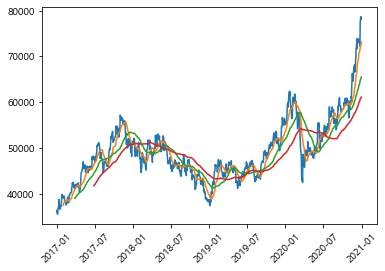

In [186]:
plt.xticks(rotation=45)
plt.plot( samsung_df.index, samsung_df['Close'] )
plt.plot( samsung_df.index, samsung_df['Close'].rolling( window=20 ).mean())
plt.plot( samsung_df.index, samsung_df['Close'].rolling( window=60 ).mean() )
plt.plot( samsung_df.index, samsung_df['Close'].rolling( window=120 ).mean() )
# samsung_df.rolling( window=60 ).mean().plot( y=['Adj Close','Close'], kind='line')
plt.show()

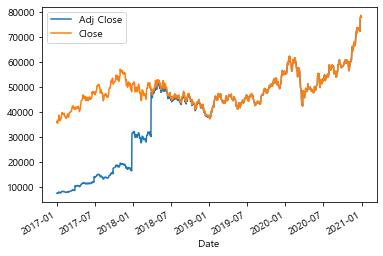

In [153]:
samsung_df.plot( kind='line', y=['Adj Close', 'Close'] )
plt.show()

In [162]:
samsung_df.rolling( window=60 ).mean().

High         59
Low          59
Open         59
Close        59
Volume       59
Adj Close    59
year         59
dtype: int64